# Métricas

## Matriz de confusión

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

# Importamos dataset iris de scikitlearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos en train test el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Corremos un clasificador
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función de scikit-learn imprime y plotea 
    la matriz de confusión pasada por parámetro. 
    Si se le pasa por parámetro 
    `normalize=True`, se le aplicará una normalización.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión sin normalizar')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de confusión normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

## GridSeach 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=33)

/home/rcrespillo/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]


In [4]:
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

## Propiedades de GridSearch

In [5]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 8}

In [6]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
grid_search.cv_results_['mean_train_score']

array([-40.95, -28.94, -30.99, -24.76, -25.05, -19.98, -18.64, -16.27,
       -22.17, -17.52, -12.44, -11.68])

In [8]:
np.sqrt(-grid_search.cv_results_['mean_train_score'])

array([6.4 , 5.38, 5.57, 4.98, 5.01, 4.47, 4.32, 4.03, 4.71, 4.19, 3.53,
       3.42])

In [9]:
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([7.11, 6.33, 6.04, 5.55, 5.84, 4.95, 5.88, 4.85, 5.84, 5.05, 4.63,
       4.04])

## RandomizedSearch

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(2, 4), 'max_features': sp_randint(2, 8)}


In [11]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3f69c45198>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3f69c45278>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [12]:
rand_search.best_params_

{'max_depth': 3, 'max_features': 7}

In [13]:
rand_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([5.65, 6.08, 4.41, 5.86, 5.42, 6.48, 5.97, 4.27, 4.63, 5.17])

In [15]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([7.15, 7.09, 6.66, 7.19, 5.75, 6.95, 6.74, 5.95, 5.67, 6.56])

In [16]:
# Comparamos los resultados entre Randomizedsearch y GridSearch
print("Promedio GridSearch RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearch RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearch RMSE:  5.50874574883307
Promedio RandomizedSearch RMSE:  6.572760124976895


## Cambiando el scoring en GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]
tree_reg = DecisionTreeRegressor()
grid_search_r2 = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search_r2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

## Evaluación en test set

In [18]:
y_pred = grid_search.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.618980314665555

In [21]:
y_pred = rand_search.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.47249182708261

In [23]:
y_pred = grid_search_r2.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.237187200680182

## Oversampling 

Ejemplo extra de oversample

Automatically created module for IPython interactive environment


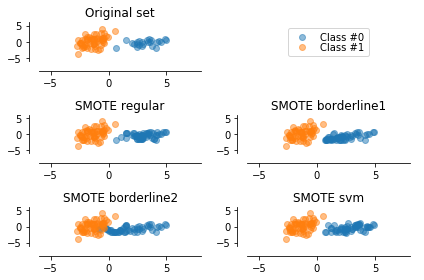

In [25]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()